<a href="https://colab.research.google.com/github/eeuuais/kaggle_comp/blob/main/%EC%BA%90%EA%B8%80%EC%8A%A4%ED%84%B0%EB%94%94(1_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1-2 캐글스터디**
* EDA To Prediction(DieTanic) https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle_data/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# checking for total null values 

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

the age, cabin and embarked have null values. i will try to fix them

how many survived?

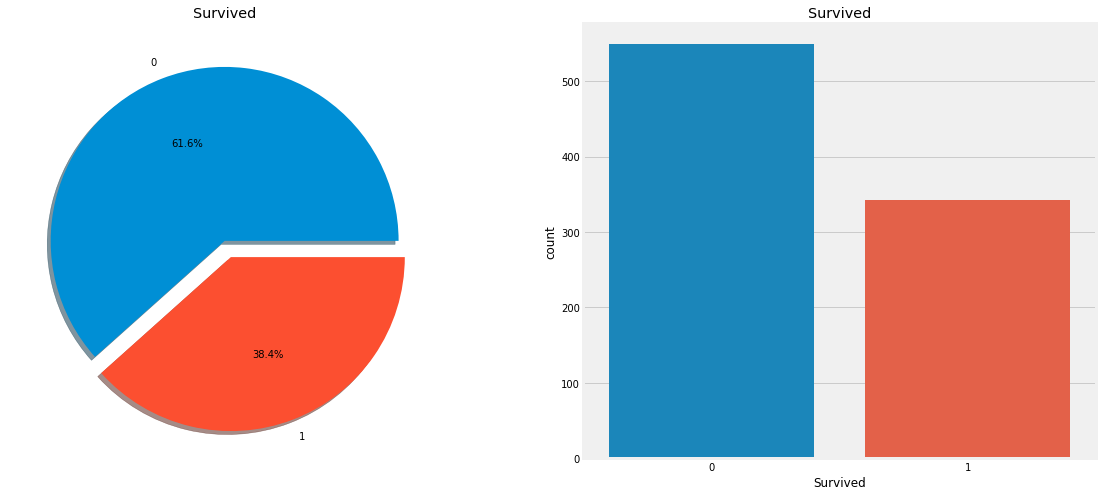

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

38.4%가 생존하였다.
891명의 승객 중 350명 정도가 생존

- categorical : sex, embarked
- ordinal : Pclass 순서가 있다
- continous : age

Sex--> Categorical Feature

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

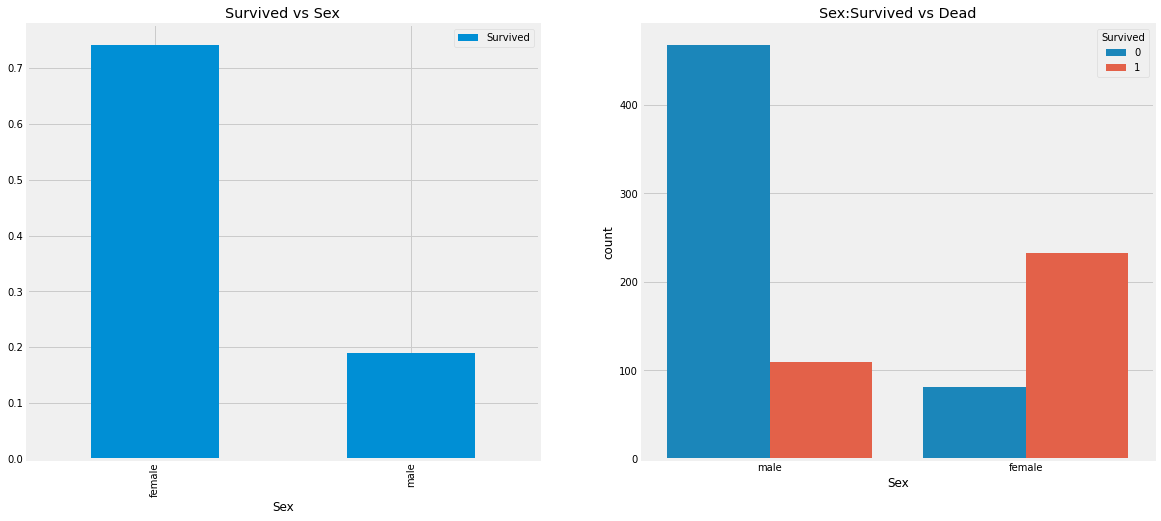

In [ ]:
f, ax = plt.subplots(1,2,figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 탄 남자의 수는 여자의 수보다 훨씬 많다. 배에 탄 여성의 생존율은 약 75%인 반면 남성의 생존율은 약 18-19%이다.

Pclass --> Ordinal Feature

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


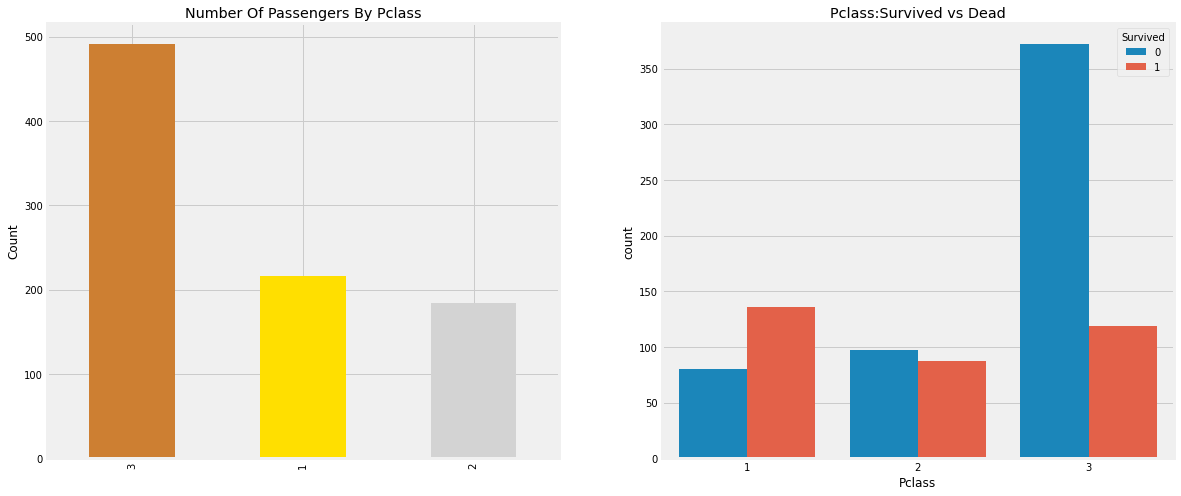

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Pclass 1의 경우 survived는 약 63%인 반면 Pclass2의 경우 약 48%

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

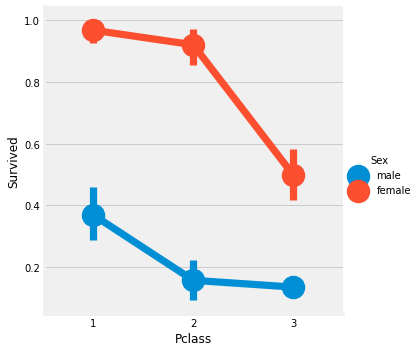

In [ ]:
# 카테고리컬 데이터를 쉽게 분리할 수 있는 factorplot 
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

이 경우 범주 값을 쉽게 분리할 수 있는 FactorPlot을 사용합니다.

CrossTab과 FactorPlot을 보면 Pclass1의 여성 94명 중 3명만이 사망했기 때문에 Pclass1 여성의 생존율이 약 95-96%라는 것을 쉽게 추론할 수 있습니다.

P등급과 관계없이 구조 시 여성이 우선권을 가짐이 분명합니다. Pclass1의 남성조차도 생존율이 매우 낮습니다.

Pclass도 중요한 기능인 것 같습니다. 다른 기능을 분석해 보겠습니다.

In [ ]:
# Age--> Continous Feature

print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


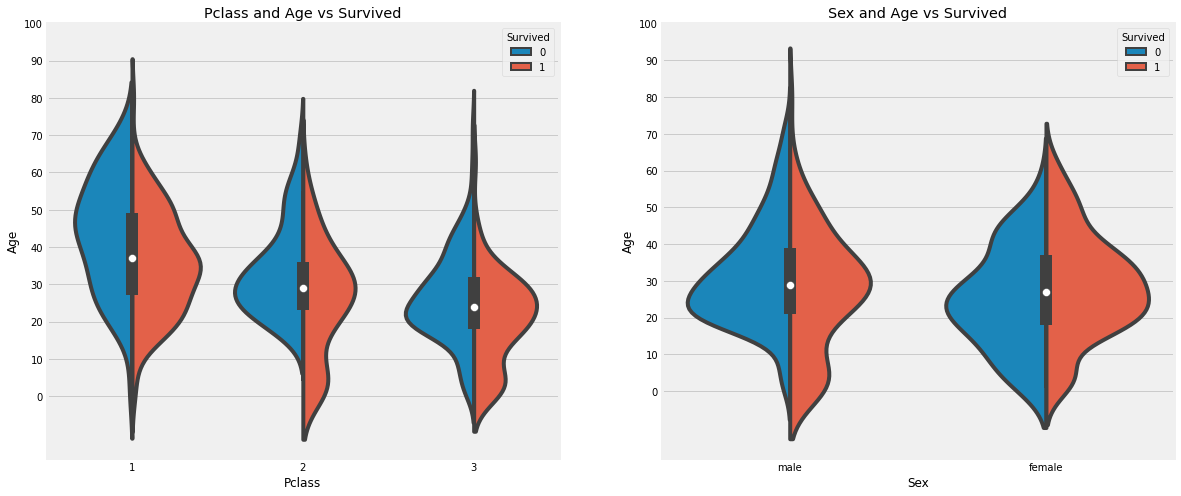

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

관찰:
1) P등급에 따라 자녀의 수가 증가하고 10세 미만 승객(즉, 어린이)의 생존율은 P등급에 관계없이 양호해 보입니다.

2)Pclass1의 20-50세 승객의 생존 가능성은 높고 여성에게는 훨씬 더 좋습니다.

3)남성의 경우 연령이 증가함에 따라 생존 확률이 감소합니다.

링크코드
앞에서 본 것처럼 나이 기능에는 177개의 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많았다는 것입니다. 우리는 29세인 평균 연령으로 4세 아이를 할당할 수 없습니다. 승객이 거짓말을 하는 연령대를 알 수 있는 방법이 있습니까??

Bingo!!!!, 이름 기능을 확인할 수 있습니다. 기능을 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있습니다. 따라서 각 그룹에 Mr 및 Mrs의 평균 값을 할당할 수 있습니다.

''이름이 뭐죠??''---> 기능 :p

In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

#lets extract the salutations 정규식으로 이름에서 이니셜을 추출하기

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


알겠습니다. Miss를 나타내는 Mlle 또는 Mme와 같이 철자가 틀린 이니셜이 있습니다. Miss로 바꾸고 다른 값도 마찬가지입니다.

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()
#lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# Filling NaN Ages

data.loc[(data.Age.isnull())&(data.Initial == 'Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'), 'Age']=46

In [ ]:
data.Age.isnull().any()

#so no null values left finally 최종적으로 null 값이 남지 않습니다.

False

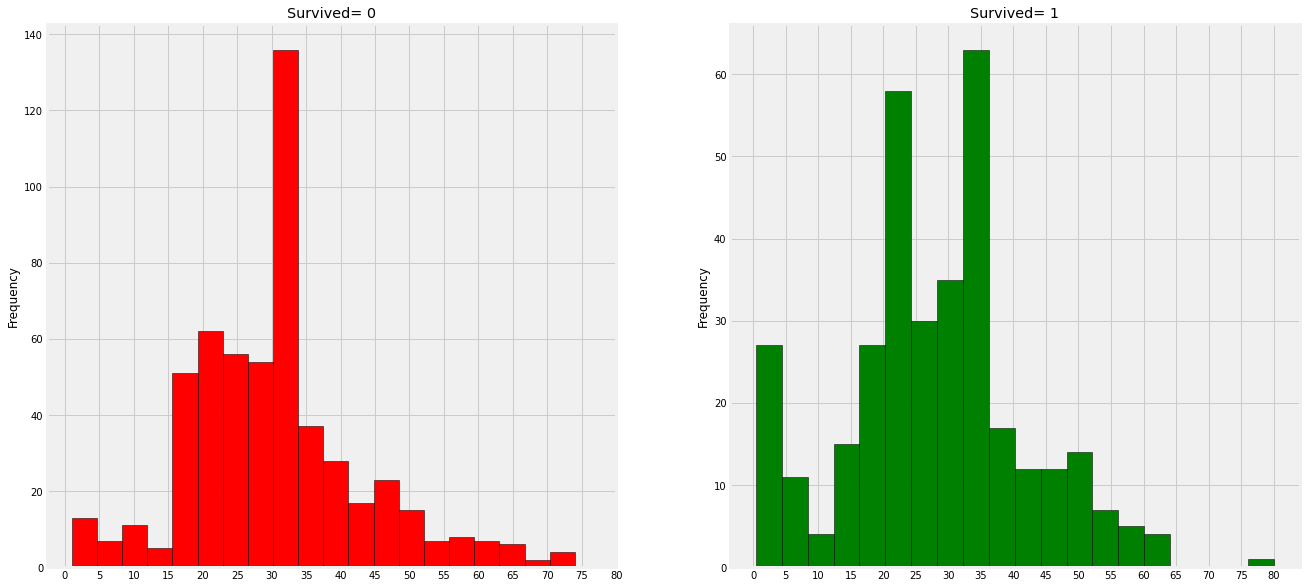

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

관찰:
1)많은 수의 유아(5세 미만)가 구해졌습니다(여성과 아동 우선 정책).

2) 가장 나이 많은 승객이 구해졌습니다(80세).

3)최대 사망자 수는 30-40세였다.

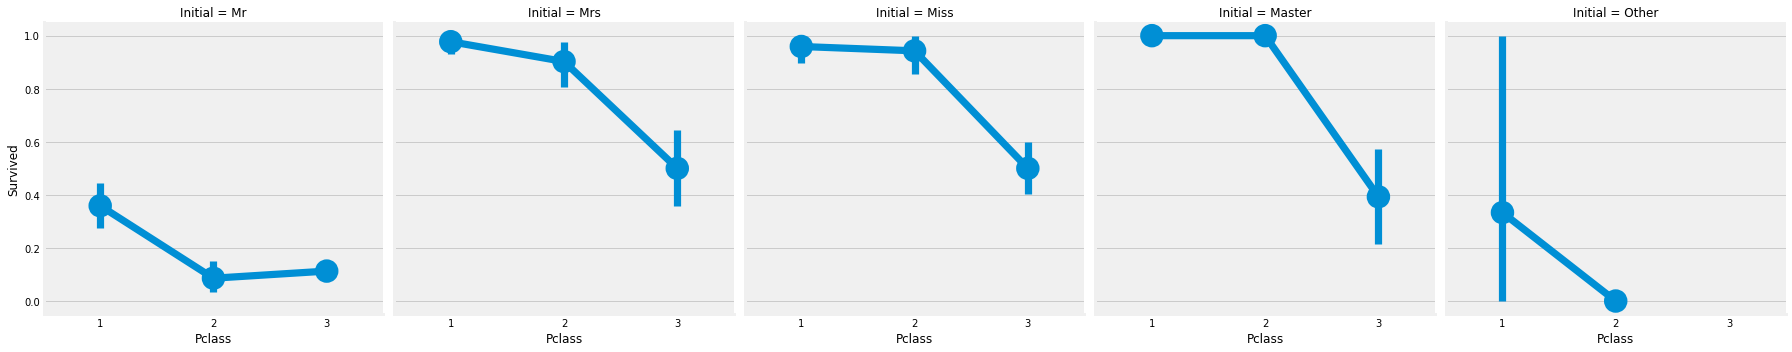

In [ ]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

따라서 여성과 아동 우선 정책은 계층에 관계없이 적용됩니다.

In [ ]:
# Embarked--> Categorical Value

pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

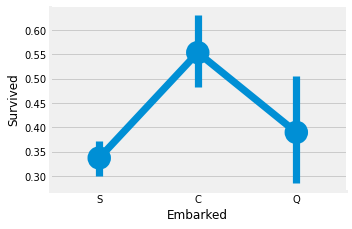

In [ ]:
#승선항별 생존 가능성

sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

포트 C의 생존 가능성은 약 0.55로 가장 높고 포트 S는 가장 낮습니다.

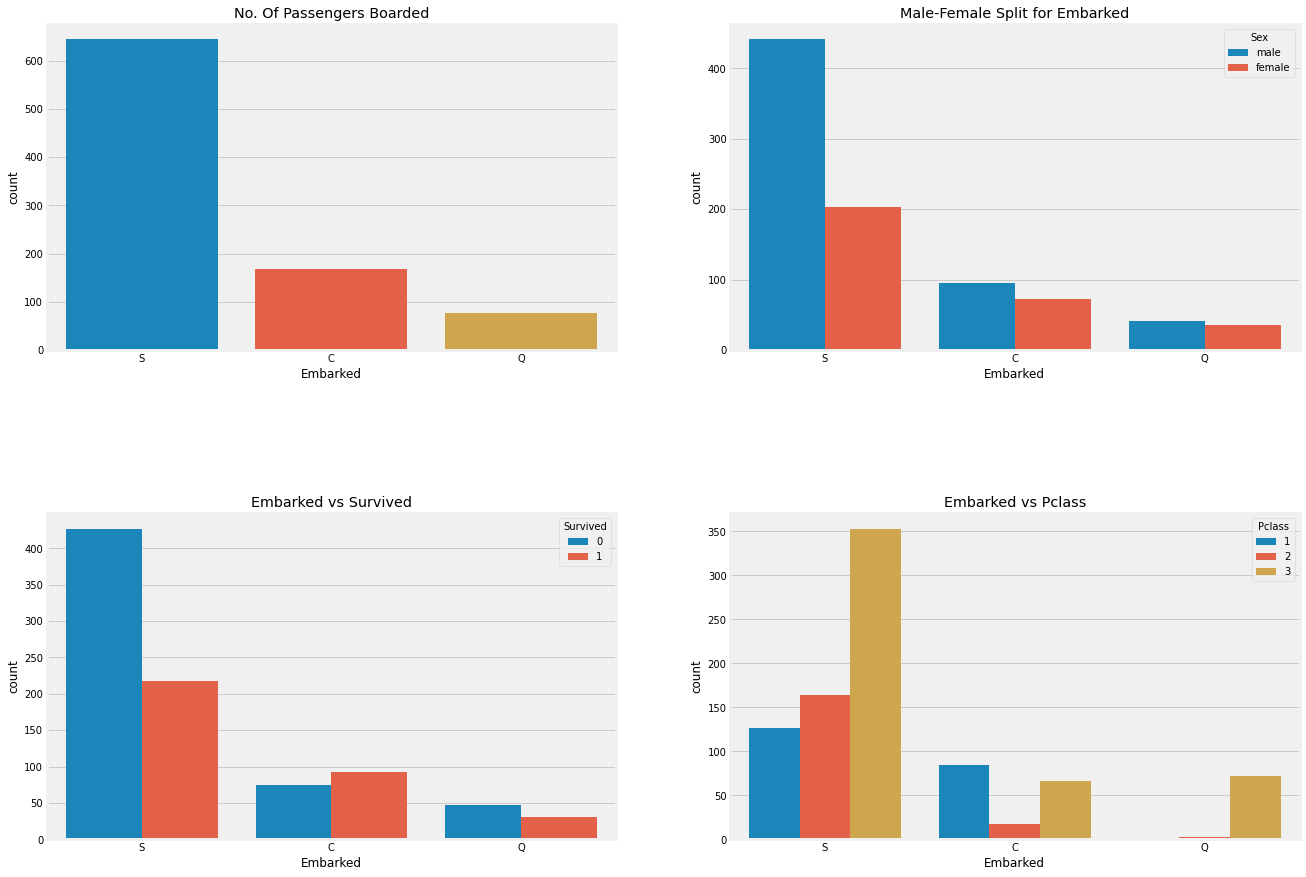

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

관찰:
1) 최대 승객은 S에서 탑승합니다. 대다수는 Pclass3에서 탑승합니다.

2)C에서 온 승객들은 상당수가 살아남았기 때문에 운이 좋아 보인다. 그 이유는 아마도 모든 Pclass1 및 Pclass2 승객의 구조 때문일 것입니다.

3) Embark S는 대부분의 부자들이 탑승한 항구를 바라보고 있습니다. 여전히 여기에서 생존 가능성은 낮습니다. 약 81%의 Pclass3 승객이 생존하지 못했기 때문입니다.

4)Port Q는 승객의 거의 95%가 Pclass3 승객이었습니다.

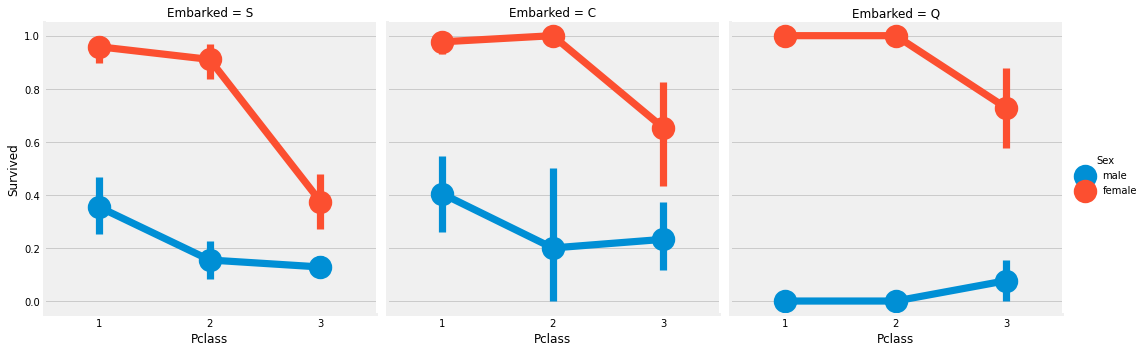

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

관찰:
1) Pclass와 상관없이 Pclass1과 Pclass2의 경우 여성의 생존 확률은 거의 1이다.

2) 포트 S는 남성과 여성 모두 생존율이 매우 낮기 때문에 Pclass3 Passenegers에게 매우 불행해 보입니다.(돈 문제)

3) 포트 Q는 거의 모든 것이 Pclass 3에서 왔기 때문에 남성에게 가장 좋지 않은 것으로 보입니다.

In [ ]:
# Filling Embarked NaN
# 포트 S에서 최대 승객이 탑승하는 것을 보았으므로 NaN을 S로 바꿉니다.

data['Embarked'].fillna('S', inplace=True)

In [ ]:
data.Embarked.isnull().any() #참이 하나라도 있으면 true 반환

False

In [ ]:
# SibSip-->Discrete Feature
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife

pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


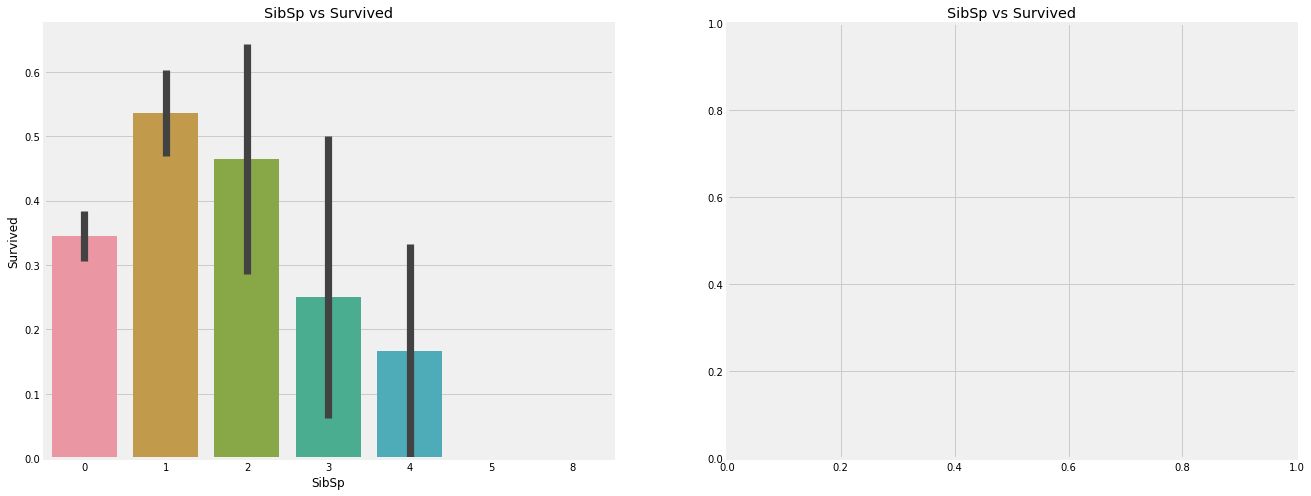

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


관찰:
Barplot과 factorplot은 승객이 형제자매 없이 혼자 탑승하는 경우 생존율이 34.5%임을 보여줍니다. 형제 수가 증가하면 그래프가 대략적으로 감소합니다. 이것은 의미가 있습니다. 즉, 가족이 타고 있다면 나 자신을 먼저 구하는 대신 그들을 구하려고 노력할 것입니다. 놀랍게도 5~8인 가족의 생존율은 0%다. 그 이유는 Pclass??

그 이유는 P클래스 때문입니다. 크로스탭은 SibSp>3인 사람이 모두 Pclass3에 있음을 보여줍니다. Pclass3(>3)의 모든 대가족이 사망하는 것이 임박했습니다.

In [ ]:
# Parch

pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭은 더 큰 가족이 Pclass3에 있음을 다시 보여줍니다.

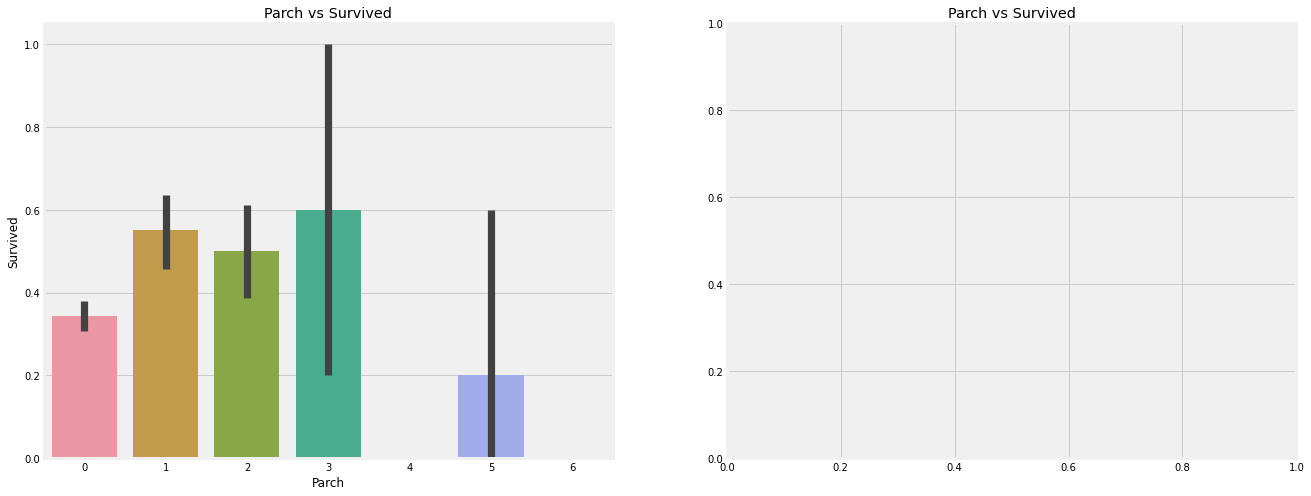

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

관찰:
여기서도 결과는 매우 유사합니다. 부모와 함께 탑승한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 증가함에 따라 감소합니다.

배에 부모가 1-3명 있는 사람에게는 생존 가능성이 높습니다. 혼자 있는 것도 치명적이며 배에 부모가 4명보다 많은 사람이 있을 때 생존 가능성이 줄어듭니다.

In [ ]:
# Fare--> Continous Feature

print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


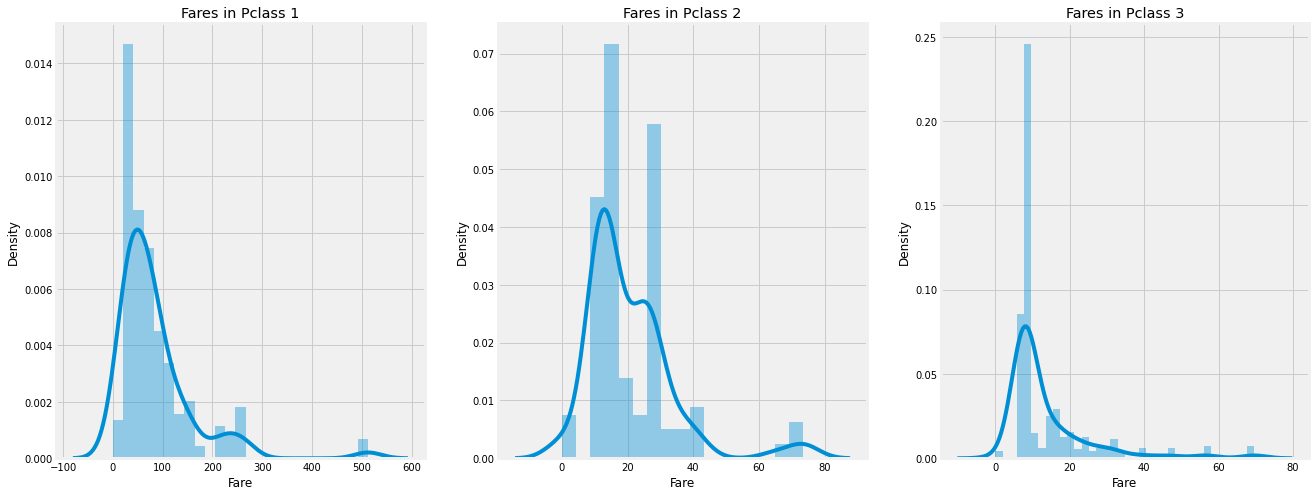

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1의 승객 운임에는 큰 분포가 있는 것으로 보이며 이 분포는 표준이 낮아짐에 따라 계속 감소합니다. 이 역시 연속적이므로 비닝을 사용하여 불연속 값으로 변환할 수 있습니다.

모든 기능에 대한 간략한 관찰:
성별: 여성의 생존 가능성은 남성에 비해 높습니다.

Pclass:1등석 승객이 생존 가능성이 더 높다는 가시적인 추세가 있습니다. Pclass3의 생존율은 매우 낮습니다. 여성의 경우 Pclass1의 생존 가능성은 거의 1이며 Pclass2의 생존 확률도 높습니다. 돈이 이긴다!!!.

연령: 5~10세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객들이 많이 사망했습니다.

착수: 이것은 매우 흥미로운 기능입니다. 대부분의 Pclass1 승객이 S에서 일어났음에도 불구하고 C에서 생존 가능성이 더 높아 보입니다. Q에서 승객은 모두 Pclass3에서 왔습니다.

Parch+SibSp: 1-2명의 형제자매, 배우자 또는 1-3명의 부모가 있는 경우 혼자 있거나 대가족이 함께 여행하는 것보다 확률이 더 높습니다.

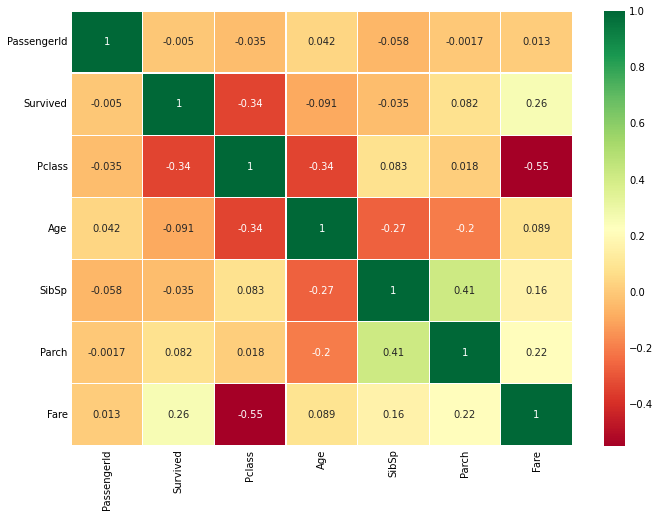

In [ ]:
# Correlation Between The Features

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


히트맵 해석
첫 번째로 주목해야 할 것은 알파벳이나 문자열 간에 상관관계를 지정할 수 없다는 것이 명백하기 때문에 숫자 기능만 비교한다는 것입니다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 살펴보겠습니다.

양의 상관 관계: 특성 A의 증가가 특성 B의 증가로 이어진다면 양의 상관 관계가 있습니다. 값 1은 완벽한 양의 상관관계를 의미합니다.

음의 상관 관계: 특성 A의 증가가 특성 B의 감소로 이어지는 경우 음의 상관 관계가 있습니다. 값 -1은 완벽한 음의 상관관계를 의미합니다.

이제 두 기능이 고도로 또는 완벽하게 상관되어 있으므로 하나의 증가가 다른 하나의 증가로 이어진다고 가정해 보겠습니다. 이는 두 기능이 매우 유사한 정보를 포함하고 있으며 정보의 차이가 거의 또는 전혀 없음을 의미합니다. 둘 다 거의 동일한 정보를 포함하므로 이를 MultiColinearity라고 합니다.

둘 중 하나가 중복되므로 둘 다 사용해야 한다고 생각하십니까? 모델을 만들거나 교육하는 동안 교육 시간과 많은 이점을 줄이기 때문에 중복 기능을 제거해야 합니다.

이제 위의 히트맵에서 기능이 그다지 상관관계가 없음을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch, 즉 0.41 사이입니다. 따라서 모든 기능을 계속 사용할 수 있습니다.


## Part2: Feature Engineering and Data Cleaning

이제 기능 엔지니어링이란 무엇입니까?

기능이 있는 데이터 세트가 제공될 때마다 모든 기능이 중요할 필요는 없습니다. 제거해야 하는 중복 기능이 많이 있을 수 있습니다. 또한 다른 기능을 관찰하거나 정보를 추출하여 새로운 기능을 얻거나 추가할 수 있습니다.

이름 기능을 사용하여 이니셜 기능을 가져오는 것이 그 예입니다. 새로운 기능을 얻고 몇 가지를 제거할 수 있는지 봅시다. 또한 기존 관련 기능을 Predictive Modeling에 적합한 형태로 변환합니다.

# Age_band

연령_대역
연령 기능 문제:
나이가 연속적인 특징이라고 앞에서 언급했듯이 기계 학습 모델의 연속 변수에는 문제가 있습니다.

예: 스포츠인을 성별로 그룹화하거나 정렬하라고 하면 쉽게 남성과 여성으로 구분할 수 있습니다.

이제 나이별로 그룹화하라고 하면 어떻게 하시겠습니까? 30명의 사람이 있는 경우 30개의 연령 값이 있을 수 있습니다. 이제 이것은 문제가 됩니다.

비닝 또는 정규화를 통해 이러한 연속 값을 범주 값으로 변환해야 합니다. 구간화를 사용합니다. 즉, 연령 범위를 단일 구간으로 그룹화하거나 단일 값을 할당합니다.

승객의 최대 연령은 80세입니다. 따라서 0-80 범위를 5개의 빈으로 나누겠습니다. 따라서 80/5=16입니다. 따라서 크기가 16인 저장소입니다.

In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

# 밴드별 탑승인원 확인

,Age_band
1,382
2,325
0,104
3,69
4,11


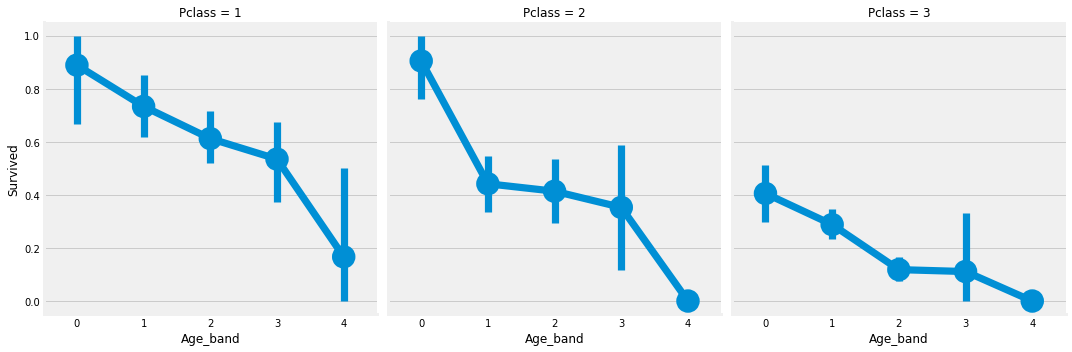

In [ ]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

사실.. Pclass와 상관없이 나이가 들면서 생존율이 떨어집니다.

Family_Size 및 혼자
이 시점에서 "Family_size" 및 "Alone"이라는 새로운 기능을 생성하고 분석할 수 있습니다. 이 기능은 Parch와 SibSp의 요약입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. Alone은 승객이 혼자인지 여부를 나타냅니다.

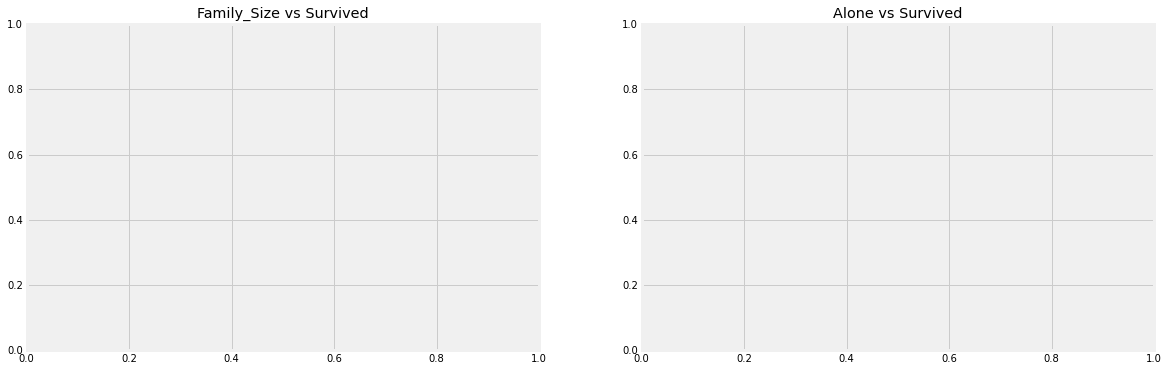

In [ ]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0은 승객이 혼자임을 의미합니다. 분명히 혼자이거나 family_size=0이면 생존 가능성이 매우 낮습니다. 가족 규모 > 4의 경우 기회도 감소합니다. 이것은 또한 모델의 중요한 기능으로 보입니다. 더 자세히 살펴보겠습니다.

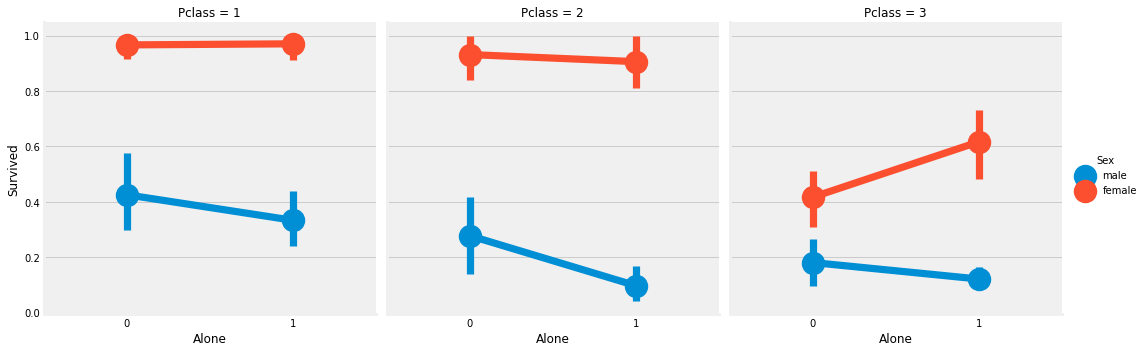

In [ ]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

가족이 있는 여성보다 혼자 있는 여성의 확률이 높은 Pclass3를 제외하고는 성별이나 P등급에 상관없이 혼자 있는 것이 유해함을 알 수 있다.

요금 범위
운임도 연속 특성이므로 서수 값으로 변환해야 합니다. 이를 위해 pandas.qcut을 사용합니다.

따라서 qcut이 수행하는 작업은 통과한 빈 수에 따라 값을 분할하거나 정렬하는 것입니다. 따라서 5개의 빈을 통과하면 값을 5개의 별도 빈 또는 값 범위에 동일한 간격으로 정렬합니다.

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 요금 범위가 증가할수록 생존 가능성이 높아진다는 것을 분명히 알 수 있습니다.

이제 Fare_Range 값을 그대로 전달할 수 없습니다. Age_Band에서와 마찬가지로 싱글톤 값으로 변환해야 합니다.

In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

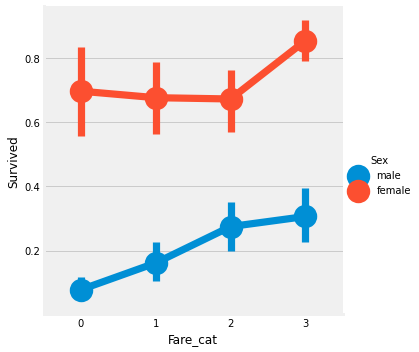

In [ ]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

분명히 Fare_cat이 증가하면 생존 확률이 증가합니다. 이 기능은 Sex와 함께 모델링 시 중요한 기능이 될 수 있습니다.

문자열 값을 숫자로 변환
기계 학습 모델에 문자열을 전달할 수 없기 때문에 Sex, Embarked 등과 같은 기능을 숫자 값으로 변환해야 합니다.

In [ ]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

불필요한 기능 삭제
이름--> 어떤 범주 값으로도 변환할 수 없으므로 이름 기능이 필요하지 않습니다.

Age--> Age_band 기능이 있으므로 필요하지 않습니다.

티켓--> 분류할 수 없는 임의의 문자열입니다.

Fare--> Fare_cat 기능이 있으므로 필요하지 않습니다.

캐빈--> 많은 NaN 값과 많은 승객이 여러 캐빈을 가지고 있습니다. 그래서 이것은 쓸모없는 기능입니다.

Fare_Range-->fare_cat 기능이 있습니다.

PassengerId--> 분류할 수 없습니다.

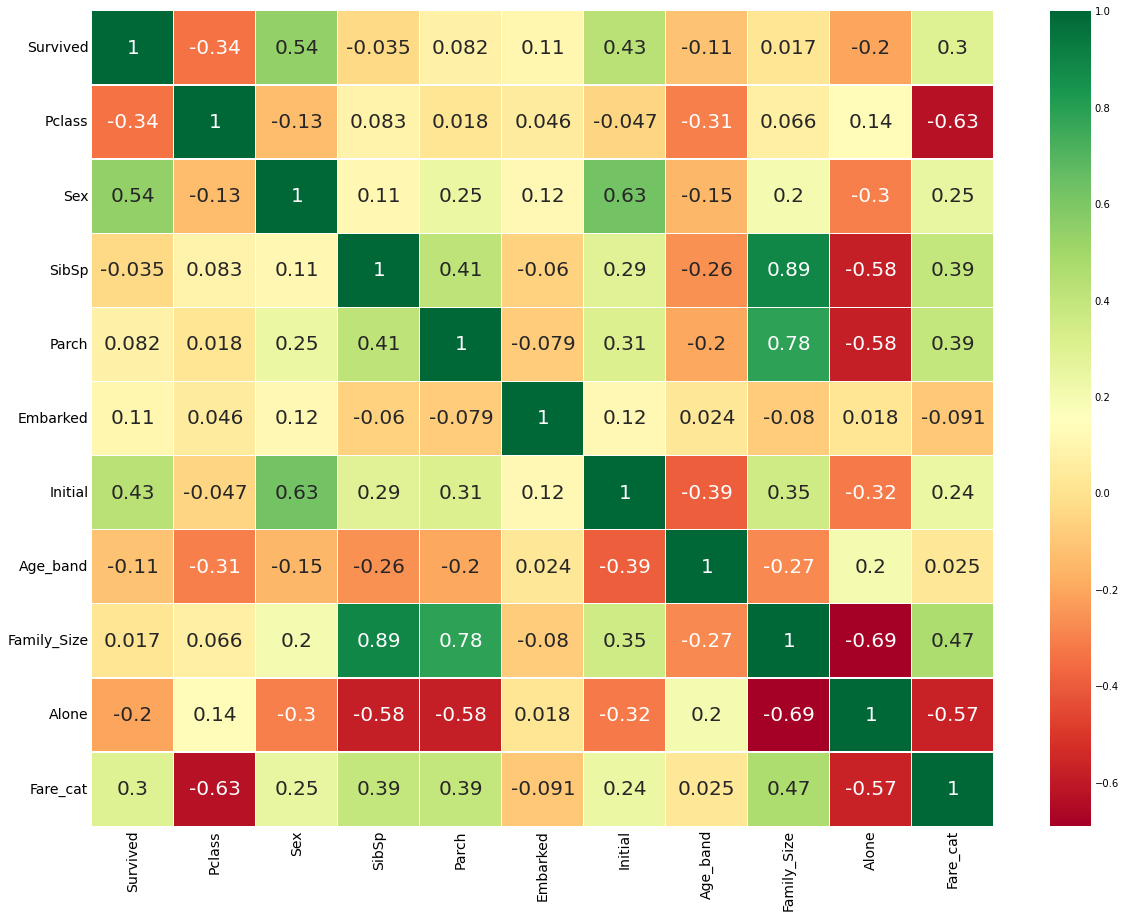

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

이제 위의 상관 관계 도표에서 긍정적으로 관련된 몇 가지 기능을 볼 수 있습니다. 그들 중 일부는 SibSp andd Family_Size 및 Parch 및 Family_Size이고 일부 부정적인 것들은 Alone 및 Family_Size입니다.

3부: 예측 모델링
우리는 EDA 부분에서 몇 가지 통찰력을 얻었습니다. 하지만 그것으로는 승객의 생존 여부를 정확하게 예측하거나 알 수 없습니다. 이제 우리는 훌륭한 분류 알고리즘을 사용하여 승객이 생존할지 여부를 예측할 것입니다. 다음은 모델을 만드는 데 사용할 알고리즘입니다.

1)로지스틱 회귀

2) 서포트 벡터 머신(선형 및 방사형)

3)랜덤 포레스트

4)K-최근접 이웃

5)나이브 베이즈

6) 의사 결정 트리

7)로지스틱 회귀

In [ ]:
#importing all the required ml packages

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [ ]:
# Radial Support Vector Machines(rbf-SVM)

model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [ ]:
# Linear Support Vector Machine(linear-SVM)

model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


In [ ]:
#Logistic Regression

model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [ ]:
# Decision Tree

model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


In [ ]:
# K-Nearest Neighbours(KNN)

model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


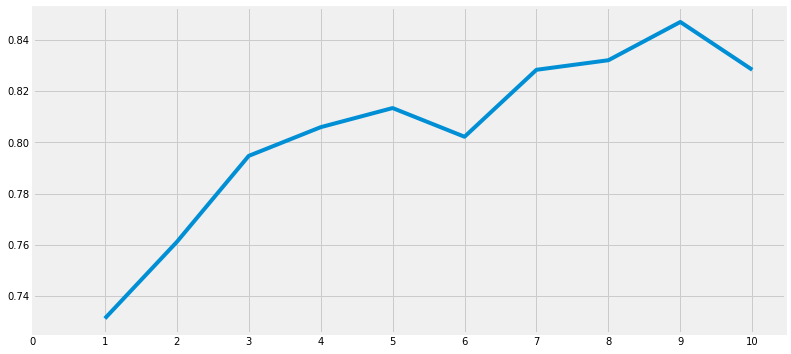

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [ ]:
# Gaussian Naive Bayes

model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [ ]:
# Random Forests

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


**Cross Validation**

In [ ]:
#for K-fold cross validation
from sklearn.model_selection import KFold

#score evaluation
from sklearn.model_selection import cross_val_score

#prediction
from sklearn.model_selection import cross_val_predict

# k=10, split the data into 10 equal parts
kfold = KFold(n_splits=10, random_state=22)

xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

ValueError: ignored

NameError: ignored

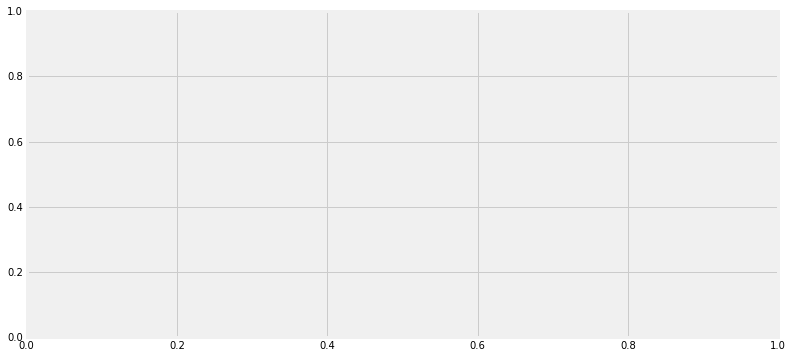

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

NameError: ignored

**Confusion Matrix**

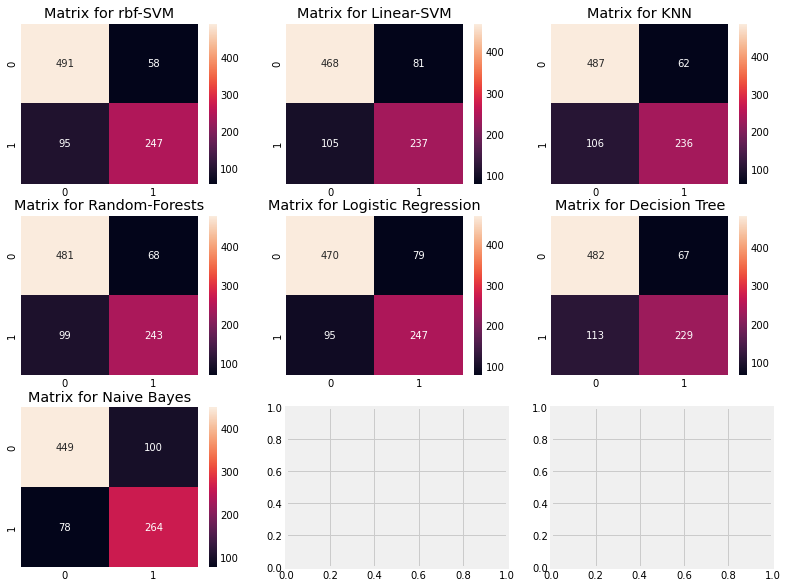

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()